# Autoencoder & T-SNE for Classification

In [71]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import os
sns.set(style="whitegrid")
np.random.seed(203)

data_source_dir = r"/home/jasonchandatascience/Keras/autoencoders/data"

In [6]:
def GetPath(directory, file):
    return os.path.join(directory, file)

In [7]:
data = pd.read_csv(GetPath(data_source_dir, "creditcard.csv"))

In [11]:
data["Time"] = data["Time"].apply(lambda x : x / 3600 % 24)

# Data Exploration

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,14.537951,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,5.847061,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,10.598194,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,15.010833,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,19.329722,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,23.999444,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [17]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [21]:
data["Class"].value_counts() / data.shape[0] * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

# Sampling only 1000 non fraud cases and all 492 fraud cases

In [22]:
non_fraud = data[data['Class'] == 0].sample(1000)
fraud = data[data['Class'] == 1]

df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
X = df.drop(['Class'], axis = 1).values
Y = df["Class"].values

In [23]:
df.shape

(1492, 31)

# Visualizing fraud vs non fraud after T-SNE

shape of X_t is now (1492, 2), reduced from 31 variables to just 2


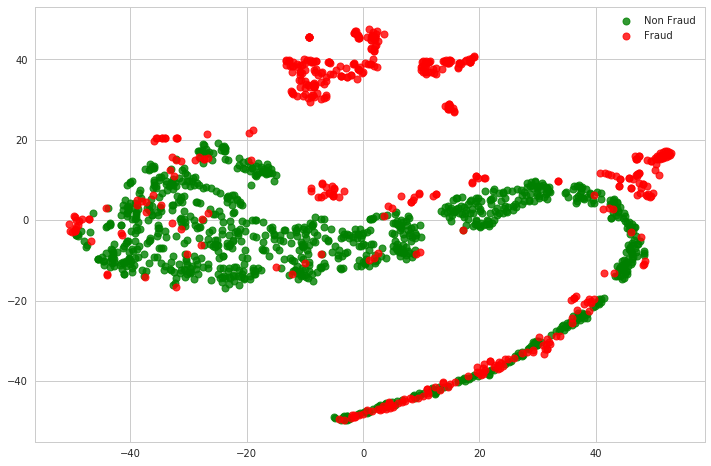

In [32]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)
    
    print(f"shape of X_t is now {X_t.shape}, reduced from 31 variables to just 2")
    sns.set_palette('muted')
    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, Y, "original.png")

From the above graph we can observe that there are many non_fraud transactions which are very close to fraud transactions, thus are difficult to accurately classify from a model.

# Autoencoders

![](https://i.imgur.com/Rrmaise.png)

We will create an autoencoder model in which we only show the model **non-fraud cases**. The model will try to learn the **best representation of non-fraud cases**. The same model will be used to generate the **representations of fraud cases and we expect them to be different from non-fraud ones**.

## Using Keras

In [36]:
## Input Layer

# 30 variables
input_layer = Input(shape=(X.shape[1], ))

## Encoder
encoded = Dense(100, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation="relu")(encoded)

## Decoder

decoder = Dense(50, activation="tanh")(encoded)
decoder = Dense(100, activation="tanh")(decoder)

## Output layer
output_layer = Dense(X.shape[1], activation="relu")(decoder)

In [37]:
autoencoder = Model(input_layer, output_layer)

In [38]:
autoencoder.compile(optimizer="adadelta", loss="mse")

In [39]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                3030      
Total params: 18,830
Trainable params: 18,830
Non-trainable params: 0
_________________________________________________________________


## Min-max normalization before training

In [40]:
data.shape

(284807, 31)

In [41]:
x = data.drop(["Class"], axis=1)
y = data["Class"].values

x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]

In [43]:
x_scale.shape

(284807, 30)

In [44]:
x_norm.shape

(284315, 30)

In [45]:
x_fraud.shape

(492, 30)

The beauty of this approach is that we do not need too many samples of data for learning the good representations. We will use only 2000 rows of non fraud cases to train the autoencoder. Additionally, We do not need to run this model for a large number of epochs.

Explanation: The choice of small samples from the original dataset is based on the intuition that one class characteristics (non fraud) will differ from that of the other (fraud). To distinguish these characteristics we need to show the autoencoders only one class of data. **This is because the autoencoder will try to learn only one class and automaticlly distinuish the other class.**

In [47]:
autoencoder.fit(x=x_norm[:2000], y=x_norm[:2000], batch_size=256, epochs=10, shuffle=True, validation_split=0.2)

Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.7219 - val_loss: 0.4842
Epoch 2/10
1600/1600 [==============================] - 0s 24us/step - loss: 0.4609 - val_loss: 0.3261
Epoch 3/10
1600/1600 [==============================] - 0s 23us/step - loss: 0.3052 - val_loss: 0.2209
Epoch 4/10
1600/1600 [==============================] - 0s 22us/step - loss: 0.1991 - val_loss: 0.1235
Epoch 5/10
1600/1600 [==============================] - 0s 23us/step - loss: 0.1298 - val_loss: 0.1263
Epoch 6/10
1600/1600 [==============================] - 0s 23us/step - loss: 0.1311 - val_loss: 0.0887
Epoch 7/10
1600/1600 [==============================] - 0s 22us/step - loss: 0.0990 - val_loss: 0.0967
Epoch 8/10
1600/1600 [==============================] - 0s 23us/step - loss: 0.1125 - val_loss: 0.0792
Epoch 9/10
1600/1600 [==============================] - 0s 22us/step - loss: 0.0852 - val_loss: 0.0793
Epoch 10/10
1600/1600 [====

# Latent Representations

Now, the model is trained. We are intereseted in obtaining latent representation of the input learned by the model. This can be accessed by the weights of the trained model. We will create another network containing sequential layers, and we will only add the trained weights till the third layer where latent representation exists.

In [59]:
autoencoder.layers

In [49]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [50]:
hidden_representation.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
Total params: 8,150
Trainable params: 8,150
Non-trainable params: 0
_________________________________________________________________


Generate the hidden representations of two classes : non-fraud and fraud by predicting the raw inputs using the above model.

In [65]:
norm_hid_rep = hidden_representation.predict(x_norm[2000:5000])
fraud_hid_rep = hidden_representation.predict(x_fraud)

In [66]:
norm_hid_rep.shape

(3000, 50)

In [67]:
fraud_hid_rep.shape

(492, 50)

shape of X_t is now (3492, 2), reduced from 31 variables to just 2


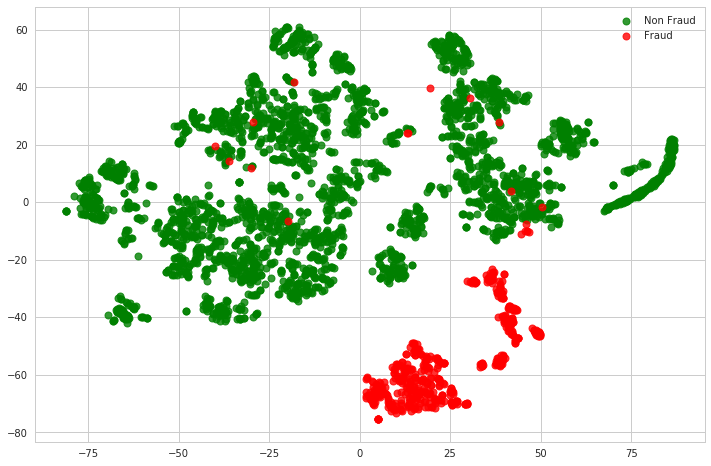

In [68]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
tsne_plot(rep_x, rep_y, "latent_representation.png")

we can observe that now fraud and non-fraud transactions are pretty visibile and are linearly separable. Now we dont need any complex model to classify this, even the simpler models can be used to predict. Here is the before and after view of Fraud and Non Fraud transactions.

In [69]:
from IPython.display import display, Image, HTML
display(HTML("""<table align="center">
<tr ><td><b>Actual Representation (Before) </b></td><td><b>Latent Representation (After)</b></td></tr>
<tr><td><img src='original.png'></td><td>
             <img src='latent_representation.png'></td></tr></table>"""))

Actual Representation (Before),Latent Representation (After)
,


# Baseline logistic regression

In [70]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       753
         1.0       1.00      0.82      0.90       120

   micro avg       0.98      0.98      0.98       873
   macro avg       0.99      0.91      0.95       873
weighted avg       0.98      0.98      0.97       873


Accuracy Score:  0.9759450171821306


In [73]:
confusion_matrix(val_y, pred_y)

array([[753,   0],
       [ 21,  99]])